In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()

In [2]:
q = "select * from sqlite_master where type='table';"
cursor.execute(q).fetchall()

[('table',
  'facts',
  'facts',
  2,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float, "created_at" datetime, "updated_at" datetime)'),
 ('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)')]

In [3]:
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [4]:
q1 = "select * from facts limit 5"
cursor.execute(q1).fetchall()

[(1,
  'af',
  'Afghanistan',
  652230,
  652230,
  0,
  32564342,
  2.32,
  38.57,
  13.89,
  1.51,
  '2015-11-01 13:19:49.461734',
  '2015-11-01 13:19:49.461734'),
 (2,
  'al',
  'Albania',
  28748,
  27398,
  1350,
  3029278,
  0.3,
  12.92,
  6.58,
  3.3,
  '2015-11-01 13:19:54.431082',
  '2015-11-01 13:19:54.431082'),
 (3,
  'ag',
  'Algeria',
  2381741,
  2381741,
  0,
  39542166,
  1.84,
  23.67,
  4.31,
  0.92,
  '2015-11-01 13:19:59.961286',
  '2015-11-01 13:19:59.961286'),
 (4,
  'an',
  'Andorra',
  468,
  468,
  0,
  85580,
  0.12,
  8.13,
  6.96,
  0.0,
  '2015-11-01 13:20:03.659945',
  '2015-11-01 13:20:03.659945'),
 (5,
  'ao',
  'Angola',
  1246700,
  1246700,
  0,
  19625353,
  2.78,
  38.78,
  11.49,
  0.46,
  '2015-11-01 13:20:08.625072',
  '2015-11-01 13:20:08.625072')]

In [5]:
pd.read_sql_query(q1, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


# OUTLIERS

In [6]:
q2 = "select min(population), max(population), min(population_growth), max(population_growth) from facts"
cursor.execute(q2).fetchall()

[(0, 7256490011, 0.0, 4.02)]

In [7]:
pd.read_sql_query(q2, conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


Finding the country with population is 0

In [8]:
q3 = "select * from facts where population == 0"
cursor.execute(q3).fetchall()

[(250,
  'ay',
  'Antarctica',
  None,
  280000,
  None,
  0,
  None,
  None,
  None,
  None,
  '2015-11-01 13:38:44.885746',
  '2015-11-01 13:38:44.885746')]

In [9]:
pd.read_sql_query(q3, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


Since the min population is 0, select min population and set it equal to population instead set it directly to 0.

In [10]:
q4 = "select * from facts where population == (select min(population) from facts)"
cursor.execute(q4).fetchall()

[(250,
  'ay',
  'Antarctica',
  None,
  280000,
  None,
  0,
  None,
  None,
  None,
  None,
  '2015-11-01 13:38:44.885746',
  '2015-11-01 13:38:44.885746')]

In [11]:
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


In [12]:
q5 = "select * from facts where population == 7256490011"
cursor.execute(q5).fetchall()

[(261,
  'xx',
  'World',
  None,
  None,
  None,
  7256490011,
  1.08,
  18.6,
  7.8,
  None,
  '2015-11-01 13:39:09.910721',
  '2015-11-01 13:39:09.910721')]

In [13]:
pd.read_sql_query(q5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


In [14]:
q6 = "select * from facts where population == (select MAX(population) from facts)"
cursor.execute(q6).fetchall()

[(261,
  'xx',
  'World',
  None,
  None,
  None,
  7256490011,
  1.08,
  18.6,
  7.8,
  None,
  '2015-11-01 13:39:09.910721',
  '2015-11-01 13:39:09.910721')]

In [15]:
pd.read_sql_query(q6, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


# HISTOGRAM

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

q7 = "select population from facts where population != (select max(population) from facts) and population != (select min(population) from facts)"
q8 = "select population_growth from facts"
q9 = "select birth_rate from facts"
q10 = "select death_rate from facts"

pd.read_sql_query(q7, conn).hist(ax=ax1)
pd.read_sql_query(q8, conn).hist(ax=ax2)
pd.read_sql_query(q9, conn).hist(ax=ax3)
pd.read_sql_query(q10, conn).hist(ax=ax4)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E96005B38>],
      dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E9655D400>,
      dtype=object)

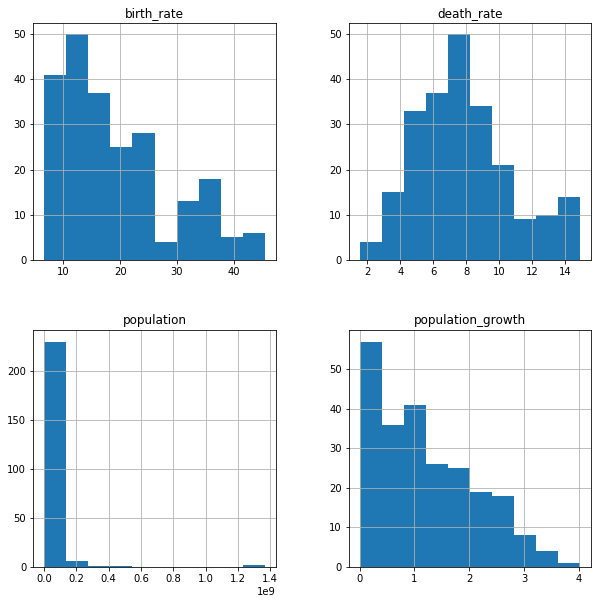

In [17]:
fig1 = plt.figure(figsize = (10,10))
ax = fig1.add_subplot(111)
q11 = "select population, population_growth, birth_rate, death_rate from facts where population != (select max(population) from facts) and population != (select min(population) from facts)"
pd.read_sql_query(q11, conn).hist(ax=ax)

# Which Countries have the highest population density?

In [18]:
q12 = "select name, cast(population as float)/cast(area as float) density from facts order by density DESC"
pd.read_sql_query(q12, conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E96A0A4A8>],
      dtype=object)

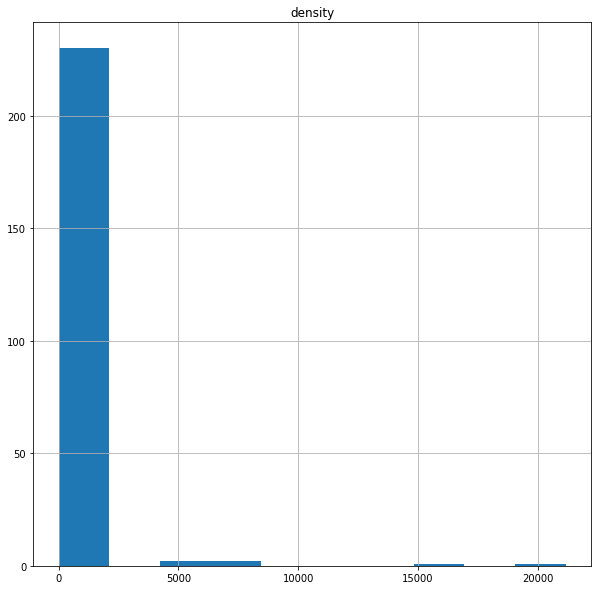

In [19]:
fig2 = plt.figure(figsize = (10,10))
ax = fig2.add_subplot(111)
pd.read_sql_query(q12, conn).hist(ax=ax)

# Which countries have the highest ratios of water to land?

In [31]:
q13 = "select name, cast(area_water as float)/cast(area_land as float) water_to_land from facts order by water_to_land DESC"
pd.read_sql_query(q13, conn)

,name,water_to_land
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


British Indian Ocean Territory has more water than land.